# Задание на coursera #

## Уменьшение количества цветов изображения ##

Цель:
* использовать алгоритм K-Means
* работать с задачами обучения без учителя
* работать с изображениям в Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from typing import Tuple
%matplotlib inline

**Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1.**

In [3]:
image = img_as_float(imread('parrots.jpg'))

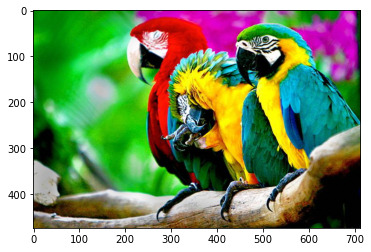

In [8]:
import pylab
pylab.imshow(image)

**Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB**

In [4]:
image.shape

(474, 713, 3)

In [7]:
pixels = pd.DataFrame(np.reshape(image,(image.shape[0]*image.shape[1], 3)), columns = ["R", "G", "B"])
pixels.head()

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


**Запустите алгоритм K-Means**

In [10]:
def cluster_pixels(pixels: pd.DataFrame, n_clusters: int=8) -> pd.DataFrame:
    pixels = pixels.copy()

    model = KMeans(n_clusters=n_clusters, init="k-means++", random_state=241)
    pixels["cluster"] = model.fit_predict(pixels)

    return pixels


In [11]:
def mean_median_image(pixels: pd.DataFrame) -> Tuple[np.array, np.array]:
    means = pixels.groupby("cluster").mean().values
    mean_pixels = np.array([means[c] for c in pixels["cluster"]])
    mean_image = np.reshape(mean_pixels, (w, h, d))

    medians = pixels.groupby("cluster").median().values
    median_pixels = np.array([medians[c] for c in pixels["cluster"]])
    median_image = np.reshape(median_pixels, (w, h, d))

    return mean_image, median_image

**Измерьте качество получившейся сегментации с помощью метрики PSNR.**

In [12]:
def psnr(image1: np.array, image2: np.array) -> float:
    mse = np.mean((image1 - image2) ** 2)
    return 10.0 * np.log10(1.0 / mse)

**Найдите минимальное количество кластеров, при котором значение PSNR выше 20**

In [14]:
w, h, d = image.shape

Clustering: 1


/Users/sandrayakimova/opt/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


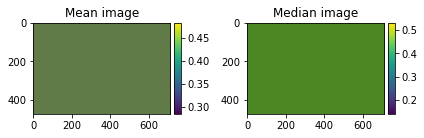

PSNR (mean): 9.82
PSNR (median): 9.43


Clustering: 2


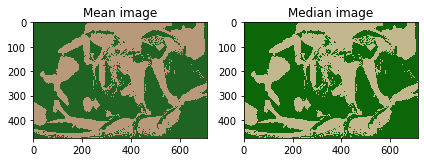

PSNR (mean): 12.08
PSNR (median): 11.65


Clustering: 3


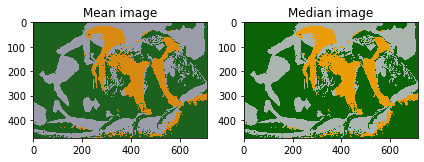

PSNR (mean): 13.15
PSNR (median): 12.79


Clustering: 4


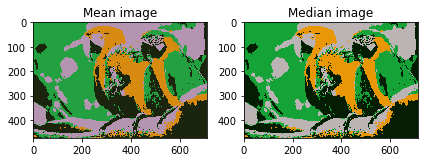

PSNR (mean): 14.37
PSNR (median): 14.01


Clustering: 5


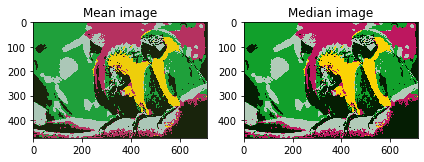

PSNR (mean): 15.53
PSNR (median): 15.18


Clustering: 6


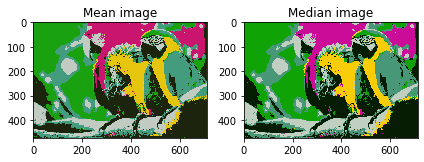

PSNR (mean): 16.54
PSNR (median): 16.05


Clustering: 7


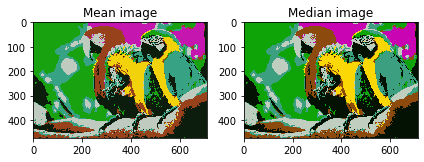

PSNR (mean): 17.64
PSNR (median): 17.34


Clustering: 8


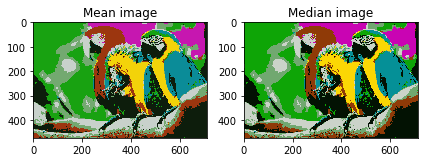

PSNR (mean): 18.44
PSNR (median): 18.15


Clustering: 9


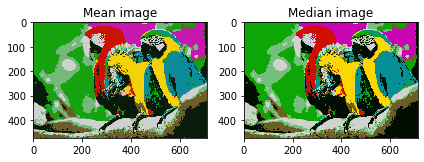

PSNR (mean): 19.11
PSNR (median): 18.82


Clustering: 10


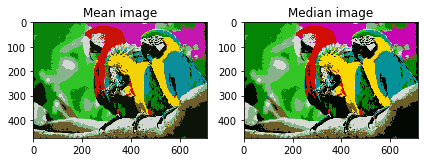

PSNR (mean): 19.64
PSNR (median): 19.41


Clustering: 11


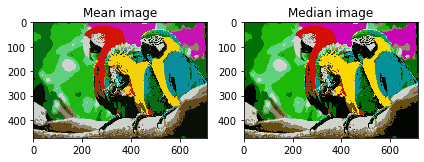

PSNR (mean): 20.13
PSNR (median): 19.85


11


In [16]:
def show_images(mean_image: np.array, median_image: np.array) -> None:
    fig=plt.figure()

    ax = fig.add_subplot(1, 2, 1)
    ax.title.set_text("Mean image")
    imshow(mean_image)

    ax = fig.add_subplot(1, 2, 2)
    ax.title.set_text("Median image")
    imshow(median_image)
    
    plt.show()

for n in range(1, 21):
    print(f"Clustering: {n}")
    
    cpixels = cluster_pixels(pixels, n)
    mean_image, median_image = mean_median_image(cpixels)
    show_images(mean_image, median_image)
    
    psnr_mean, psnr_median = psnr(image, mean_image), psnr(image, median_image)
    print(f"PSNR (mean): {psnr_mean:.2f}\nPSNR (median): {psnr_median:.2f}\n\n")
    
    if psnr_mean > 20 or psnr_median > 20:
        print(n)
        break
